# Tarea 6.2 Redes neuronales multicapa
Hernández Navarro Armando


Liga obtenida de playground: https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=6,6,4&seed=0.79233&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

Imagen obtenida:


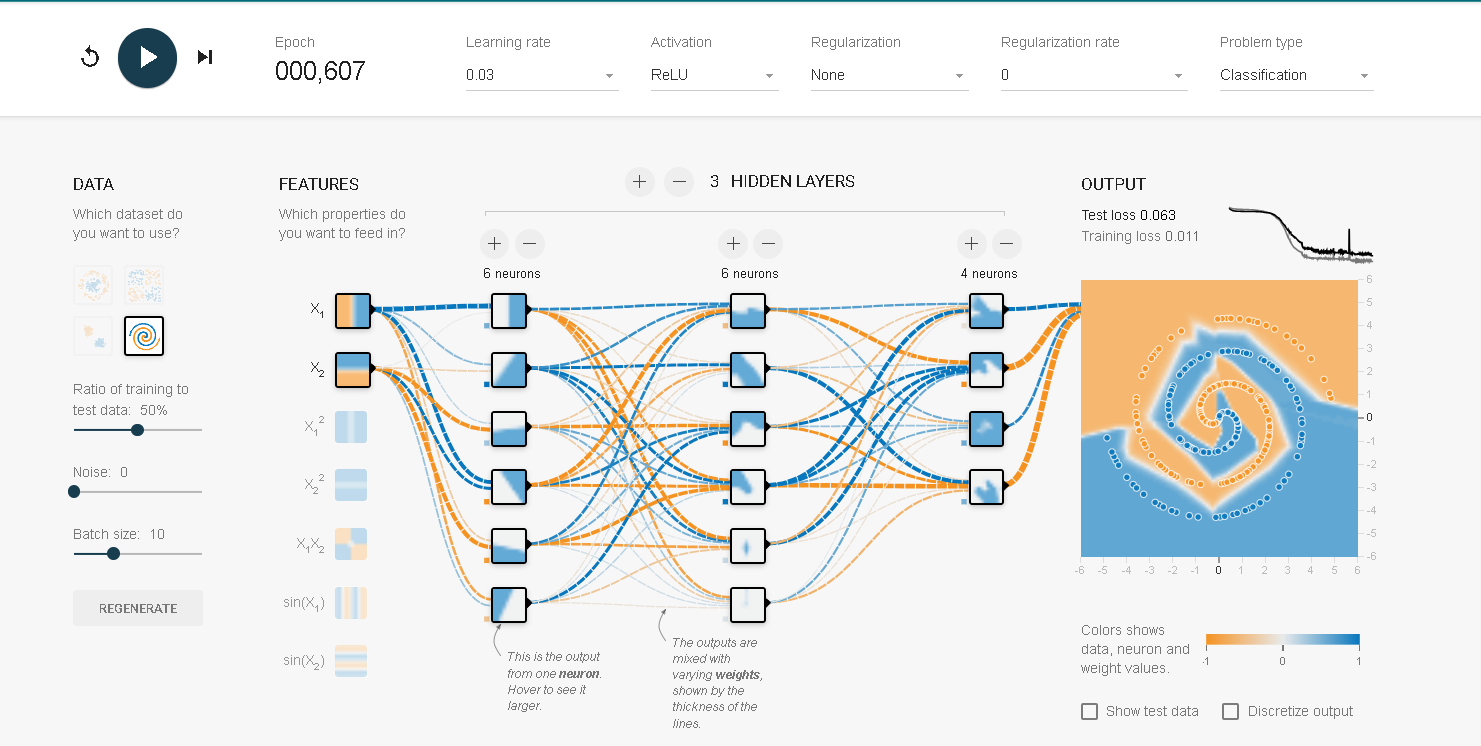

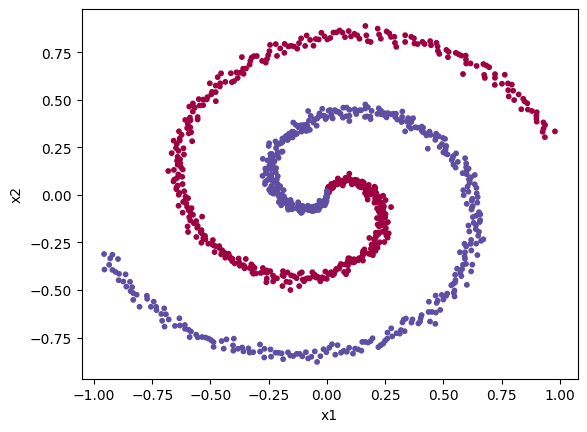

In [14]:
# Generamos nuestro dataset de espiral
import numpy as np
import matplotlib.pyplot as plt

def generate_spiral_data(n_samples, d=1, noise=0.1):
  """
  Genera datos con forma de espiral
  param:
    n_samples: Número de datos a generar
    d:
    noise: QUe tanto ruido se añade a los datos
  return:
    X: Conjunto de datos generados
  """
  t = np.linspace(0, d*np.pi, n_samples)
  r1 = np.linspace(0, 1, n_samples) + noise * np.random.randn(n_samples)
  r2 = np.linspace(0, 1, n_samples) + noise * np.random.randn(n_samples)
  x1 = r1 * np.sin(2 * t) #Cordenadas polares para calcular cordenadas de espiral 1
  y1 = r1 * np.cos(2 * t) #Cordenadas polares para calcular cordenadas de espiral 1
  x2 = r2 * np.sin(2 * t + np.pi) #Cordenadas polares para calcular cordenadas de espiral 2
  y2 = r2 * np.cos(2 * t + np.pi) #Cordenadas polares para calcular cordenadas de espiral 2

  X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2)))) # Array de cordenadas 1 y 2
  y = np.hstack((np.zeros(n_samples), np.ones(n_samples))) # Array de clase de cordenadas 1 y 2

  return X, y

# Generar datos de espirales
X, y = generate_spiral_data(n_samples=500, d=1.2, noise=0.02)

# Graficar los datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s=10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [15]:
# Creamos la red neuronal
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

#Dividimos el conjunto de datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Creamos una red con la misma configuración que la hecha en playground
model = Sequential([
  Dense(6, activation="relu", name="layer1"),
  Dense(6, activation="relu", name="layer2"),
  Dense(4, name="layer3"),
])

# Entrenamos
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=500, verbose=0,
                    batch_size=32, validation_split=0.2)

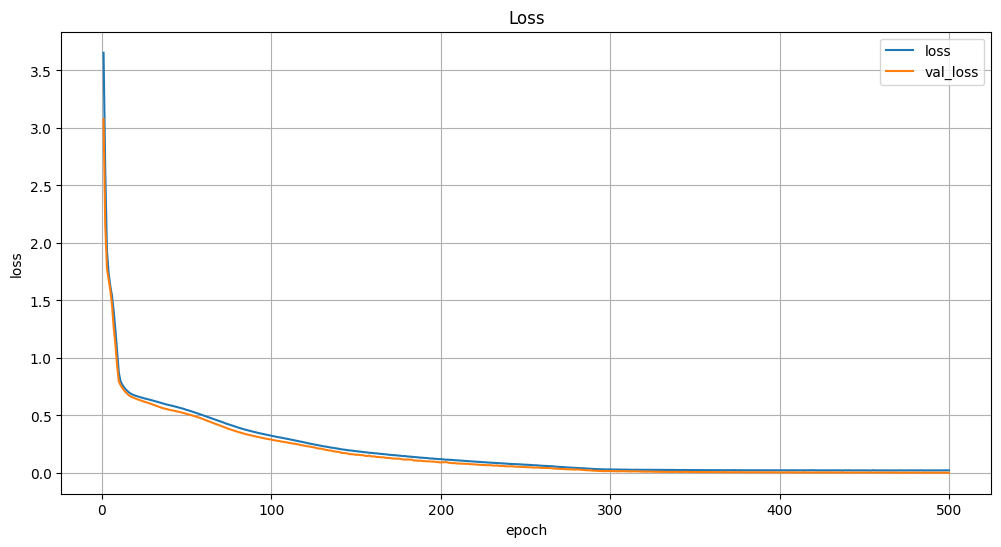

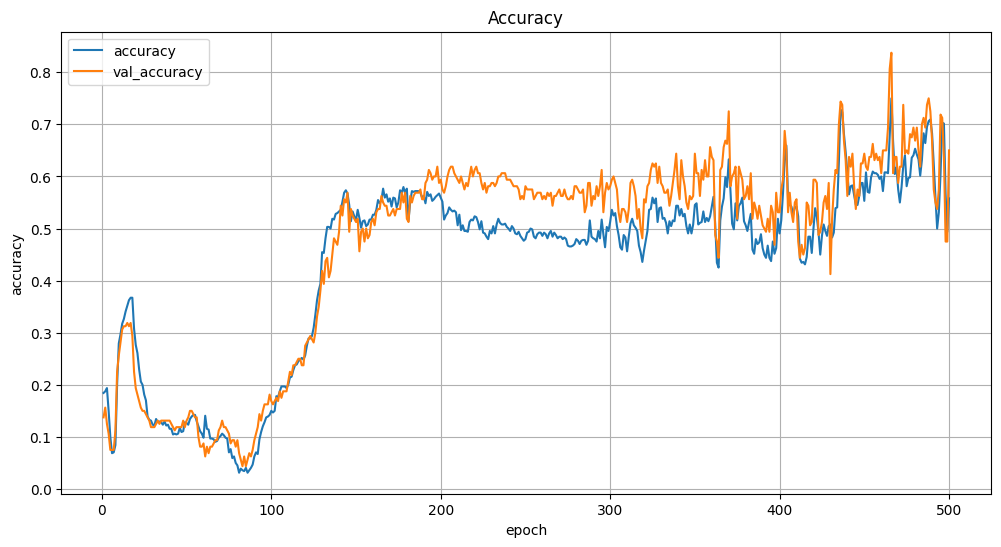

In [16]:

#Obtenemos las medidas de:
  # Perdida y Perdida en validacón
  # Accuracy y Accuracy en validacion
loss_train = history.history['loss']
loss_val = history.history['val_loss']
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
epochs = range(1, len(loss_train) + 1)

#Graficamos
# Loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss_train, label='loss')
plt.plot(epochs, loss_val, label='val_loss')
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, accuracy_train, label='accuracy')
plt.plot(epochs, accuracy_val, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)
plt.show()

79/79 [==============================] - 0s 2ms/step
(2500, 4)
(50, 50)
(50, 50)
(50, 50)


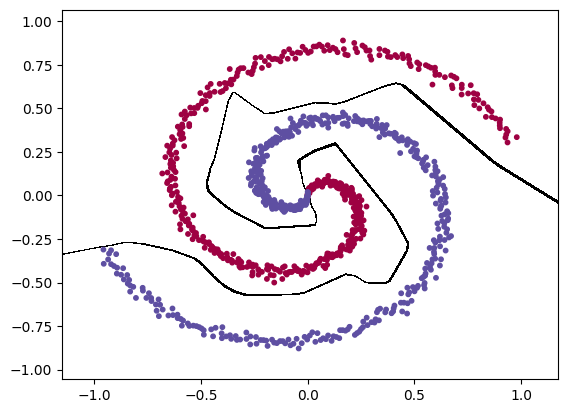

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Frontera de Decisión en el espacio de los datos de entrenamiento
def plot_decision_boundary(pred_func, X, Y, npts = 50):
  """
  Grafica los limites de decición de un modelo
  param:
    pred_func: Función que toma un conjunto de datos y devuelve las predicciones
    X: numpy array - datos a predecir
    Y: numpy array - La clasificacion verdadera de los datos
    npts: Número de puntos a usar para la graficación de los limites
  return:
    nada xd
  """
  #Calculamos minimo y maximo de x y y
  xmin, xmax = X[:, 0].min(), X[:, 0].max()
  ymin, ymax = X[:, 1].min(), X[:, 1].max()

  #Creamos una red de puntos x y y, y apllicamos la función de predicción
  dx, dy = (xmax - xmin)*0.1, (ymax - ymin)*0.1
  xx, yy = np.meshgrid(np.linspace(xmin-dx, xmax+dx, npts), np.linspace(ymin-dy, ymax+dy, npts))
  data = np.c_[xx.ravel(), yy.ravel()]
  Z = pred_func(data)
  #print(Z.shape)
  #print(xx.shape)
  #print(yy.shape)
  Z = Z[:,0]
  Z = Z.reshape(xx.shape)
  #print(Z.shape)

  #plot
  plt.contourf(xx, yy, Z, colors='k', levels=[0.48, 0.52])
  plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral, s=10)


plot_decision_boundary(lambda x: model.predict(x), X, y, 50)
plt.show()